# 이산형 확률분포

## 1차원 이산형 확률분포

In [3]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
# matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

C:\Users\k8s\AppData\Local\Temp\ipykernel_5468\574238244.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug=True, kde=False, bins=bins)


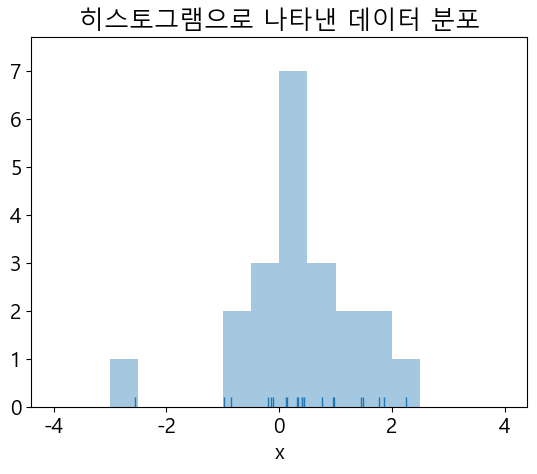

In [4]:
np.random.seed(0)
x = np.random.normal(size=21)
x

import seaborn as sns

bins = np.linspace(-4, 4, 17)
sns.distplot(x, rug=True, kde=False, bins=bins)
plt.title("히스토그램으로 나타낸 데이터 분포")
plt.xlabel("x")
plt.show()

In [5]:
print("표본평균 = {}, 표본중앙값 = {}".format(np.mean(x), np.median(x)))

표본평균 = 0.4206524782418389, 표본중앙값 = 0.4001572083672233


In [6]:
ns, _ = np.histogram(x, bins=bins)
m_bin = np.argmax(ns)
print("최빈구간 = {}~{}".format(bins[m_bin], bins[m_bin + 1]))

최빈구간 = 0.0~0.5


C:\Users\k8s\AppData\Local\Temp\ipykernel_5468\3931694161.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, bins=bins)


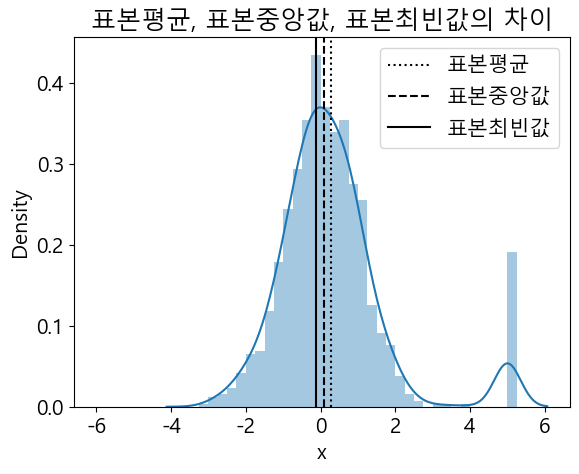

In [7]:
np.random.seed(1)
x = np.random.normal(size=1000)
x = np.hstack([x, 5 * np.ones(50)])
bins = np.linspace(-6, 6, 12 * 4 + 1)
ns, _ = np.histogram(x, bins=bins)

sample_mean = np.mean(x)
sample_median = np.median(x)
mode_index = np.argmax(ns)
sample_mode = 0.5 * (bins[mode_index] + bins[mode_index + 1])

sns.distplot(x, bins=bins)
plt.axvline(sample_mean, c='k', ls=":", label="표본평균")
plt.axvline(sample_median, c='k', ls="--", label="표본중앙값")
plt.axvline(sample_mode, c='k', ls="-", label="표본최빈값")
plt.title("표본평균, 표본중앙값, 표본최빈값의 차이")
plt.xlabel("x")
plt.legend()
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

### 1차원 이산확률분포의 정의

In [9]:
x_set = np.array([1, 2, 3, 4, 5, 6])

In [10]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [11]:
X = [x_set, f]

In [12]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 사전식으로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

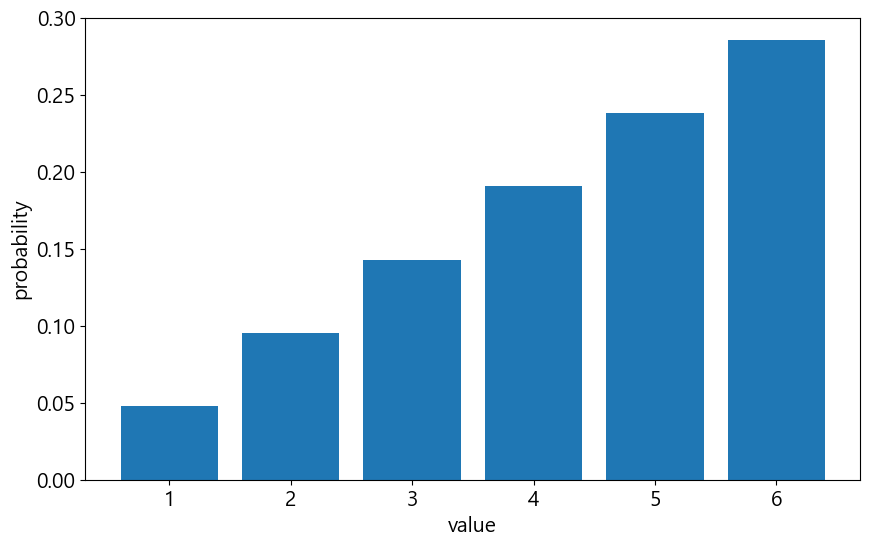

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')

plt.show()

In [14]:
np.all(prob >= 0)

True

In [15]:
np.sum(prob)

1.000

In [16]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [17]:
F(3)

0.286

In [18]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

### 1차원 이산형 확률변수의 지표

In [19]:
#### 평균

In [20]:
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [21]:
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333

In [22]:
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [23]:
E(X)

4.333

In [24]:
E(X, g=lambda x: 2*x + 3)

11.667

In [25]:
2 * E(X) + 3

11.667

#### 분산

In [26]:
mean = E(X)
np.sum([(x_k-mean)**2 * f(x_k) for x_k in x_set])

2.222

In [27]:
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [28]:
V(X)

2.222

In [29]:
V(X, lambda x: 2*x + 3)

8.889

In [30]:
2**2 * V(X)

8.889

## 2차원 이산형 확률분포

### 2차원 이산형 확률분포의 정의

In [31]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [32]:
def f_XY(x, y):
    if 1 <= y <=6 and 1 <= x - y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [33]:
XY = [x_set, y_set, f_XY]

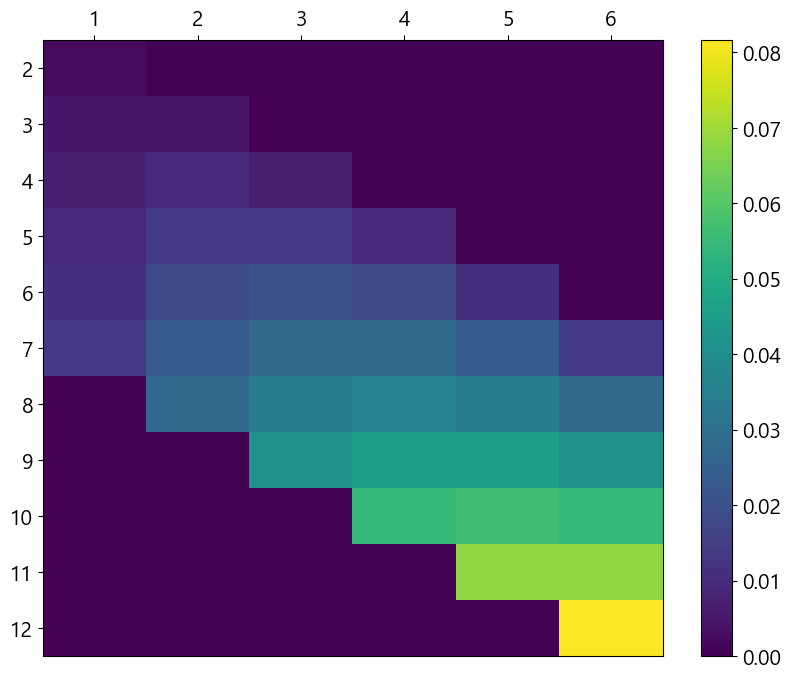

In [34]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                 for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다
ax.invert_yaxis()
# x축의 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [35]:
np.all(prob >= 0)

True

In [36]:
np.sum(prob)

1.000

In [37]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [38]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [39]:
X = [x_set, f_X]
Y = [y_set, f_Y]

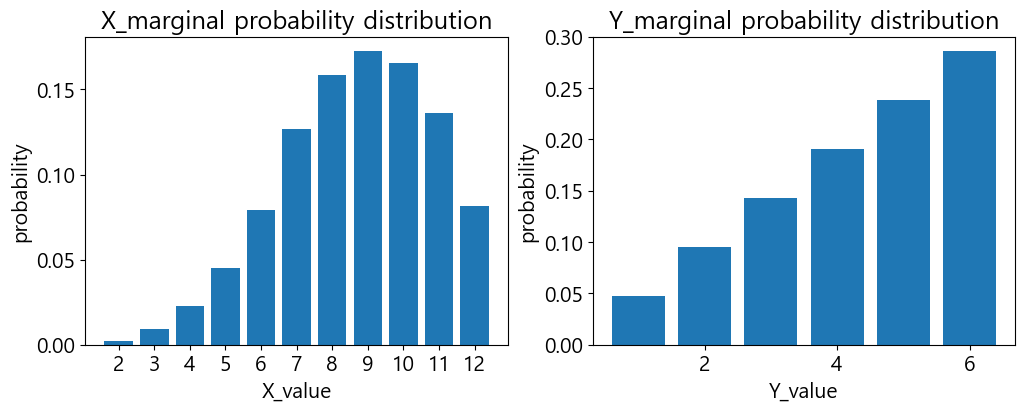

In [40]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

2차원 이산형 확률분포의 지표

In [41]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [42]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [43]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [44]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [45]:
a, b = 2, 3

In [46]:
E(XY, lambda x, y: a*x + b*y)

30.333

In [47]:
a * mean_X + b * mean_Y

30.333

In [48]:
np.sum([(x_i-mean_X)**2 * f_XY(x_i, y_j)
       for x_i in x_set for y_j in y_set])

4.444

In [49]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j)
                   for x_i in x_set for y_j in y_set])

In [50]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [51]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

In [52]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i-mean_X) * (y_j-mean_Y) * f_XY(x_i, y_j)
                    for x_i in x_set for y_j in y_set])

In [53]:
cov_xy = Cov(XY)
cov_xy

2.222

In [54]:
V(XY, lambda x, y: a*x + b*y)

64.444

In [55]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [56]:
cov_xy / np.sqrt(var_X * var_Y)

0.707

# 연속형 확률변수

In [57]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [58]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

## 1차원 연속형 확률변수

### 1차원 연속형 확률변수의 정의

In [59]:
x_range = np.array([0, 1])

In [60]:
def f(x):
    if x_range[0] <= x <= x_range[1]:
        return 2 * x
    else:
        return 0

In [61]:
X = [x_range, f]

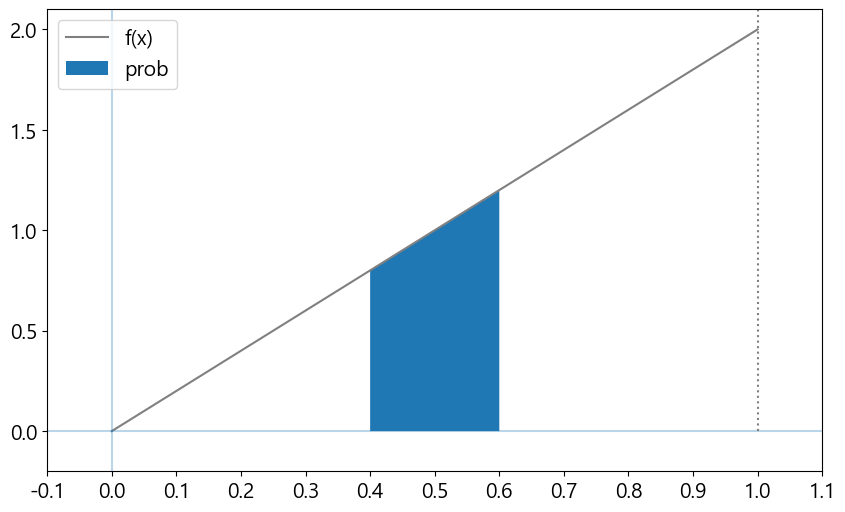

In [62]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [f(x) for x in xs], label='f(x)', color='gray')
ax.hlines(0, -0.2, 1.2, alpha=0.3)
ax.vlines(0, -0.2, 2.2, alpha=0.3)
ax.vlines(xs.max(), 0, 2.2, linestyles=':', color='gray')

# 0.4부터 0.6 까지 x좌표를 준비
xs = np.linspace(0.4, 0.6, 100)
# xs의 범위로 f(x)와 x축으로 둘러싸인 영역을 진하게 칠함
ax.fill_between(xs, [f(x) for x in xs], label='prob')

ax.set_xticks(np.arange(-0.2, 1.3, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.2, 2.1)
ax.legend()

plt.show()

In [63]:
# 첫 번째 인수는 피적분함수、두 번째 인수와 세 번째 인수는 적분 범위
integrate.quad(f, 0.4, 0.6)

(0.200, 0.000)

In [64]:
from scipy.optimize import minimize_scalar

res = minimize_scalar(f)
# 함수의 최솟값은 fun이라는 인스턴스 변수에
res.fun

0

In [65]:
integrate.quad(f, -np.inf, np.inf)[0]

1.000

In [66]:
def F(x):
    return integrate.quad(f, -np.inf, x)[0]

In [67]:
F(0.6) - F(0.4)

0.200

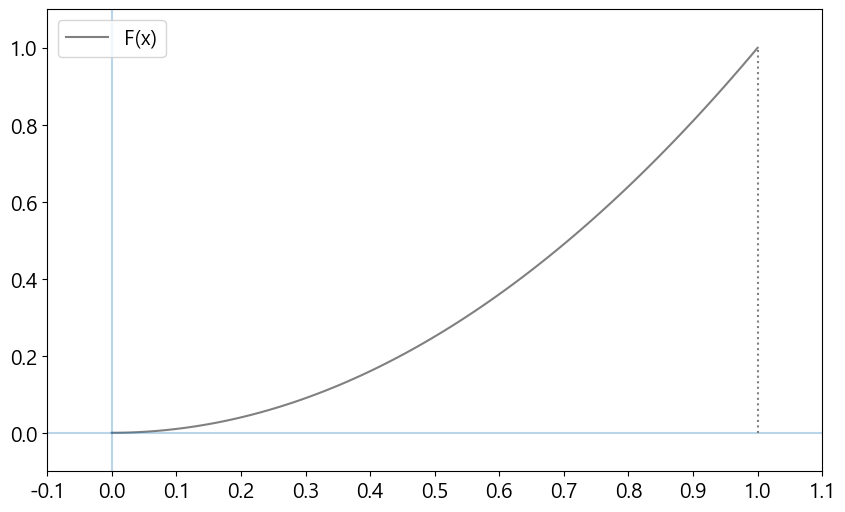

In [68]:
xs = np.linspace(x_range[0], x_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(xs, [F(x) for x in xs], label='F(x)', color='gray')
ax.hlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(0, -0.1, 1.1, alpha=0.3)
ax.vlines(xs.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(-0.1, 1.2, 0.1))
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

In [69]:
y_range = [3, 5]

def g(y):
    if y_range[0] <= y <= y_range[1]:
        return (y - 3) / 2
    else:
        return 0
    
def G(y):
    return integrate.quad(g, -np.inf, y)[0]

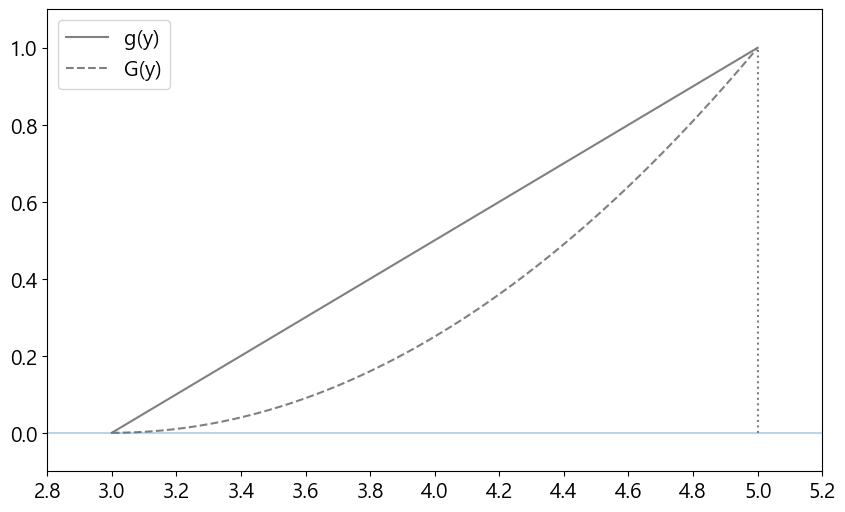

In [70]:
ys = np.linspace(y_range[0], y_range[1], 100)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

ax.plot(ys, [g(y) for y in ys],
        label='g(y)', color='gray')
ax.plot(ys, [G(y) for y in ys],
        label='G(y)', ls='--', color='gray')
ax.hlines(0, 2.8, 5.2, alpha=0.3)
ax.vlines(ys.max(), 0, 1, linestyles=':', color='gray')

ax.set_xticks(np.arange(2.8, 5.2, 0.2))
ax.set_xlim(2.8, 5.2)
ax.set_ylim(-0.1, 1.1)
ax.legend()

plt.show()

### 1차원 연속형 확률분포의 지표

In [71]:
#### 평균

In [72]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.667

In [73]:
def E(X, g=lambda x: x):
    x_range, f = X
    def integrand(x):
        return g(x) * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [74]:
E(X)

0.667

In [75]:
E(X, g=lambda x: 2*x+3)

4.333

In [76]:
2 * E(X) + 3

4.333

#### 분산

In [77]:
mean = E(X)
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.056

In [78]:
def V(X, g=lambda x: x):
    x_range, f = X
    mean = E(X, g)
    def integrand(x):
        return (g(x) - mean) ** 2 * f(x)
    return integrate.quad(integrand, -np.inf, np.inf)[0]

In [79]:
V(X)

0.056

In [80]:
V(X, lambda x: 2*x + 3)

0.222

In [81]:
2**2 * V(X)

0.222

## 2차원 연속형 확률분포

### ２차원 연속형 확률변수의 정의

In [82]:
x_range = [0, 2]
y_range = [0, 1]

In [83]:
def f_xy(x, y):
    if 0 <= y <= 1 and 0 <= x - y <= 1:
        return 4 * y * (x - y)
    else:
        return 0

In [84]:
XY = [x_range, y_range, f_xy]

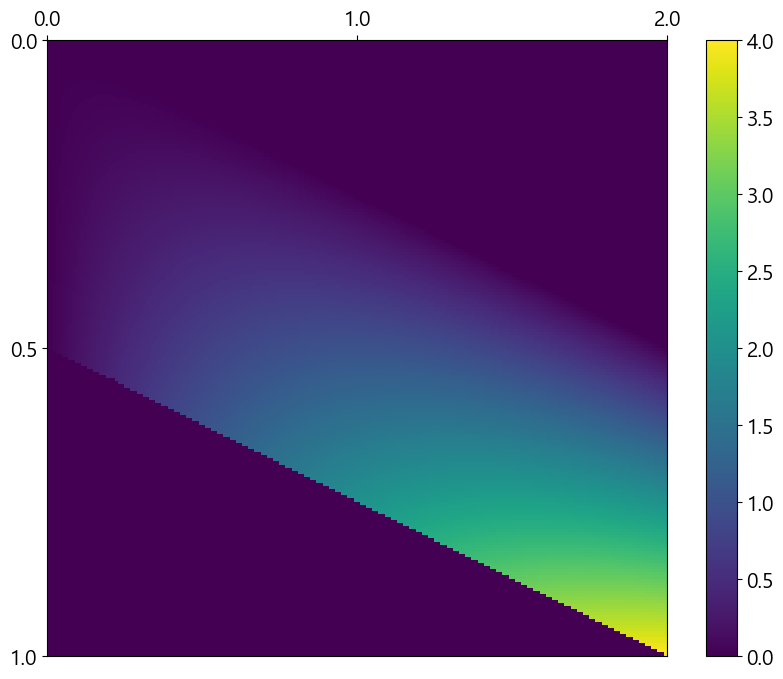

In [85]:
xs = np.linspace(x_range[0], x_range[1], 200)
ys = np.linspace(y_range[0], y_range[1], 200)
pd = np.array([[f_xy(x, y) for y in ys] for x in xs])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(pd)
ax.set_xticks(np.linspace(0, 200, 3), minor=False)
ax.set_yticks(np.linspace(0, 200, 3), minor=False)
ax.set_xticklabels(np.linspace(0, 2, 3))
ax.set_yticklabels(np.linspace(0, 1, 3))
ax.invert_yaxis()
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [86]:
# 첫 번째 인수는 피적분함수、두 번째 인수는 x의 적분구간과 y의 적분구간
integrate.nquad(f_xy,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.000

In [87]:
from functools import partial

def f_X(x):
    return integrate.quad(partial(f_xy, x), -np.inf, np.inf)[0]
def f_Y(y):
    return integrate.quad(partial(f_xy, y=y), -np.inf, np.inf)[0]

In [88]:
X = [x_range, f_X]
Y = [y_range, f_Y]

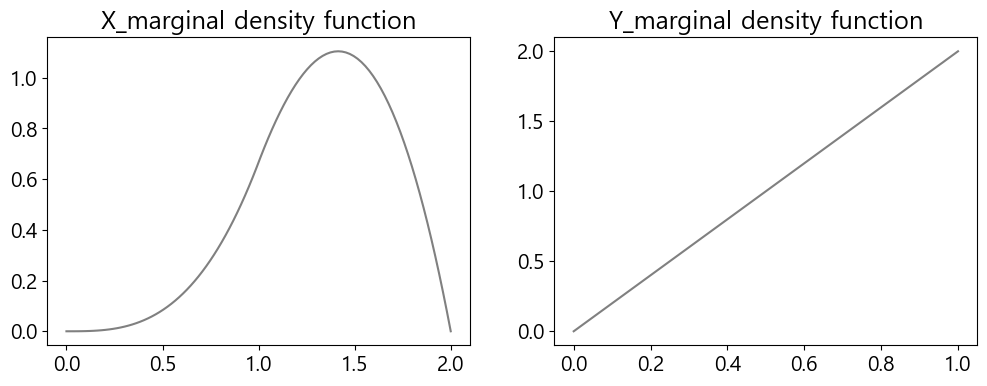

In [89]:
xs = np.linspace(*x_range, 100)
ys = np.linspace(*y_range, 100)

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.plot(xs, [f_X(x) for x in xs], color='gray')
ax2.plot(ys, [f_Y(y) for y in ys], color='gray')
ax1.set_title('X_marginal density function')
ax2.set_title('Y_marginal density function')

plt.show()

### ２차원 연속형 확률변수의 지표

#### 기댓값

In [90]:
def integrand(x, y):
    return x * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

1.333

In [91]:
def E(XY, g):
    x_range, y_range, f_xy = XY
    def integrand(x, y):
        return g(x, y) * f_xy(x, y)
    
    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [92]:
mean_X = E(XY, lambda x, y: x)
mean_X

1.333

In [93]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

0.667

In [94]:
a, b = 2, 3

In [95]:
E(XY, lambda x, y: a*x + b*y)

4.667

In [96]:
a * mean_X + b * mean_Y

4.667

#### 분산

In [97]:
def integrand(x, y):
    return (x - mean_X)**2 * f_xy(x, y)

integrate.nquad(integrand,
                [[-np.inf, np.inf],
                 [-np.inf, np.inf]])[0]

0.111

In [98]:
def V(XY, g):
    x_range, y_range, f_xy = XY
    mean = E(XY, g)
    def integrand(x, y):
        return (g(x, y) - mean)**2 * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [99]:
var_X = V(XY, lambda x, y: x)
var_X

0.111

In [100]:
var_Y = V(XY, lambda x, y: y)
var_Y

0.056

In [101]:
#### 공분산

In [102]:
def Cov(XY):
    x_range, y_range, f_xy = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    def integrand(x, y):
        return (x-mean_X) * (y-mean_Y) * f_xy(x, y)

    return integrate.nquad(integrand,
                           [[-np.inf, np.inf],
                            [-np.inf, np.inf]])[0]

In [103]:
cov_xy = Cov(XY)
cov_xy

0.056

In [104]:
V(XY, lambda x, y: a*x + b*y)

1.611

In [105]:
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

1.611

In [106]:
cov_xy / np.sqrt(var_X * var_Y)

0.707